In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df=pd.read_csv('load_dataset.csv')
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)

In [3]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [4]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95000,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158000,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168000,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349000,360.0,1.0,Semiurban,N
10,Male,Yes,2.0,Graduate,No,3200,700.0,70000,360.0,1.0,Urban,Y


In [5]:
pre_y=df['Loan_Status']
pre_X=df.drop('Loan_Status',axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1,N=0))

In [8]:
smote=SMOTE(sampling_strategy='minority')
X1,y=smote.fit_resample(dm_X,dm_y)
sc=MinMaxScaler()
X=sc.fit_transform(X1)

In [9]:
Counter(y)    

Counter({0: 332, 1: 332})

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [29]:
classifier = Sequential()
classifier.add(Dense(200,activation='relu',kernel_initializer='random_normal',input_dim=X_test.shape[1]))
classifier.add(Dense(400,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(4,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=20,epochs=100,verbose=0)
eval_model=classifier.evaluate(X_train,y_train)
eval_model

531/531 [==============================] - 0s 128us/step


[0.20306065709465193, 0.9209039807319641]

In [30]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

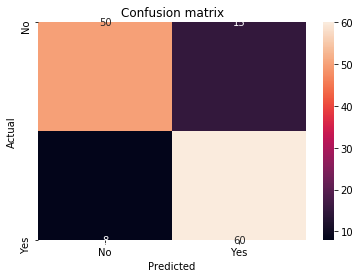

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(['No','Yes']);ax.yaxis.set_ticklabels(['No','Yes']);


In [34]:
import pickle
import joblib

In [35]:
filename='loan_model.pkl'

In [36]:
joblib.dump(classifier,filename)

['loan_model.pkl']

In [39]:
from sklearn.model_selection import StratifiedKFold

In [47]:
kfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
cvscores=[]
for train,test in kfold.split(X,y):
    model=Sequential()
    model.add(Dense(200,input_dim=17,activation='relu'))
    model.add(Dense(400,activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X[train],y[train],epochs=100,verbose=0)
    scores=model.evaluate(X[test],y[test],verbose=0)
    print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%%(+/- %.2f%%)"%(np.mean(cvscores),np.std(cvscores)))

accuracy: 82.43%
accuracy: 84.62%
accuracy: 76.47%
81.17%(+/- 3.44%)


In [46]:
#generating test data from dummy data
random_data = dm_X.sample(n=18)    
random_data.to_excel('test.xlsx')